## 求相关系数矩阵

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("洛阳钼业.csv",encoding='utf-8')
temp = df[['前收盘价_PrevClPr','开盘价_Oppr','最高价_Hipr','最低价_Lopr','收盘价_Clpr','复权价1(元)_AdjClpr1','复权价2(元)_AdjClpr2','成交量_Trdvol','成交金额_Trdsum','日振幅(%)_Dampltd','总股数日换手率(%)_DFulTurnR','流通股日换手率(%)_DTrdTurnR','日收益率_Dret','日资本收益率_Daret','等权平均市场日收益率_Dreteq','流通市值加权平均市场日收益率_Drettmv','总市值加权平均市场日收益率_Dretmc','等权平均市场日资本收益率_Dareteq','流通市值加权平均市场日资本收益_Darettmv','总市值加权平均日资本收益_Daretmc','日无风险收益率_DRfRet','市盈率_PE','市净率_PB','市现率_PCF','市销率_PS']]
corr = temp.corr(method='pearson')
# print(corr)
corr = np.absolute(corr)
print(corr)
corr.to_csv('corr.csv',sep=',',encoding='utf_8_sig')

                          前收盘价_PrevClPr  开盘价_Oppr  最高价_Hipr  最低价_Lopr  \
前收盘价_PrevClPr                  1.000000  0.994711  0.984056  0.983508   
开盘价_Oppr                       0.994711  1.000000  0.989582  0.990209   
最高价_Hipr                       0.984056  0.989582  1.000000  0.988333   
最低价_Lopr                       0.983508  0.990209  0.988333  1.000000   
收盘价_Clpr                       0.972306  0.979070  0.991859  0.989912   
复权价1(元)_AdjClpr1               0.970336  0.977325  0.990101  0.989166   
复权价2(元)_AdjClpr2               0.970337  0.977326  0.990101  0.989166   
成交量_Trdvol                     0.672254  0.676019  0.735679  0.653684   
成交金额_Trdsum                    0.726821  0.732962  0.787897  0.714968   
日振幅(%)_Dampltd                 0.486234  0.485245  0.561251  0.430422   
总股数日换手率(%)_DFulTurnR           0.672253  0.676018  0.735679  0.653684   
流通股日换手率(%)_DTrdTurnR           0.672253  0.676018  0.735679  0.653684   
日收益率_Dret                      0.111626  0.062148  

## 画图

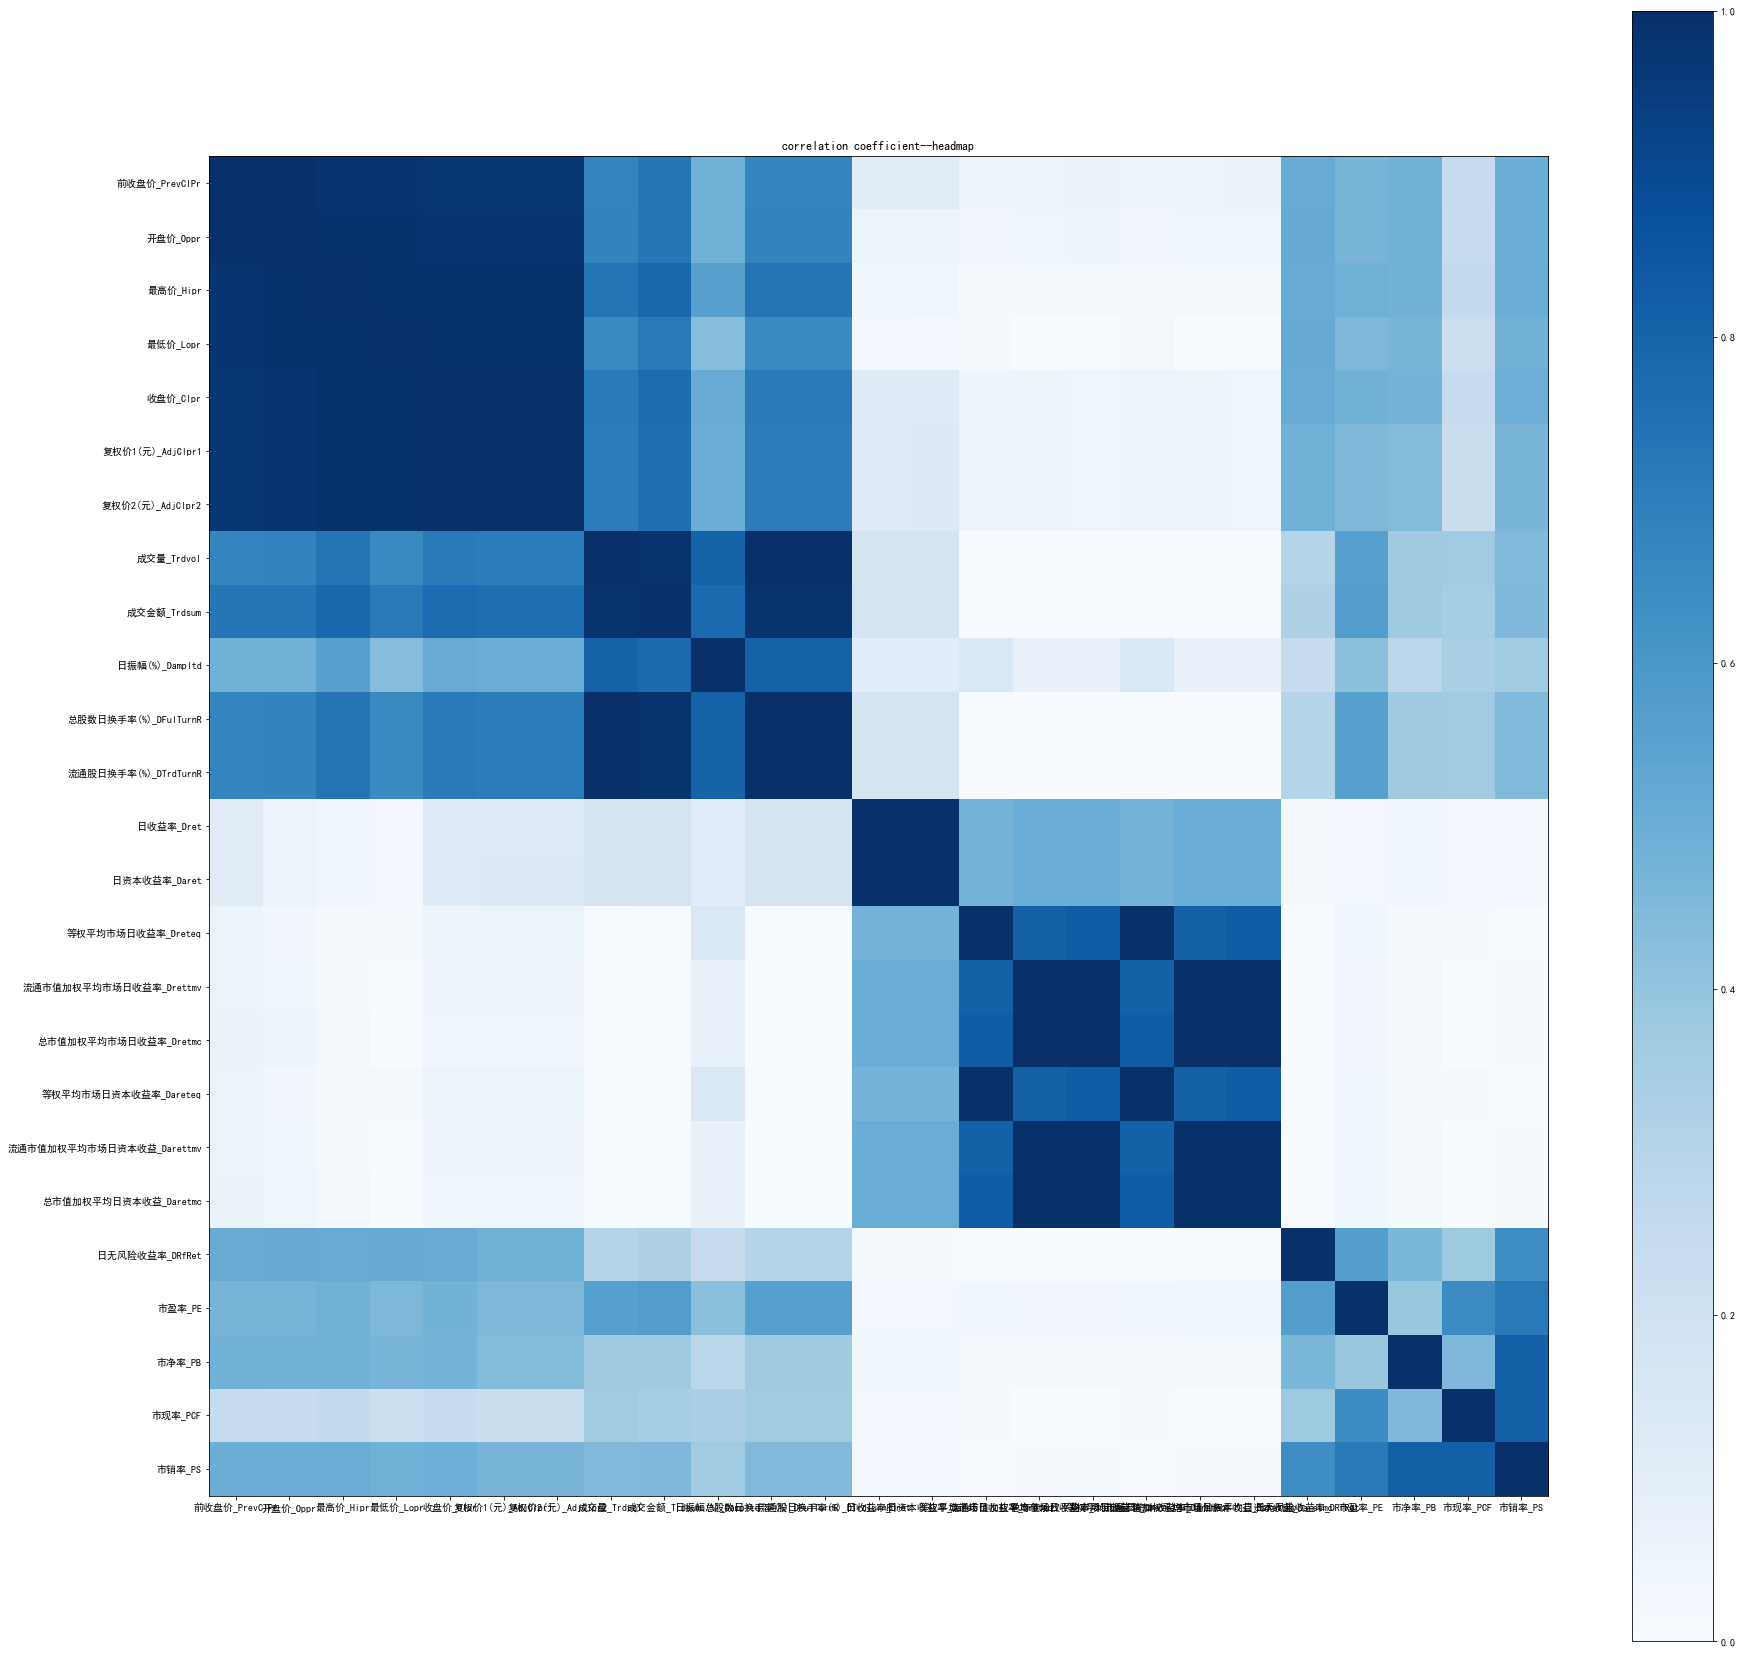

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
cmap = cm.Blues
fig = plt.figure(figsize=(30,30))
ax=fig.add_subplot(111)
map = ax.imshow(corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
plt.title('correlation coefficient--headmap')
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)
ax.set_xticks(range(len(corr)))
ax.set_xticklabels(corr.columns)
plt.colorbar(map)
plt.savefig('./corr.jpg')
plt.show()

## 格兰杰因果检验

In [3]:
from statsmodels.tsa.stattools import grangercausalitytests
for index_1 in ['开盘价_Oppr','日振幅(%)_Dampltd','等权平均市场日资本收益率_Dareteq','日无风险收益率_DRfRet','市现率_PCF','日收益率_Dret','市净率_PB']:
    for index_2 in ['总股数日换手率(%)_DFulTurnR','成交量_Trdvol']:
        print('-'*40)
        print(index_1+'    with    '+index_2)
        print(df[[index_1, index_2]])
        grangercausalitytests(df[[index_1, index_2]], maxlag=5)
        print('-'*40)


----------------------------------------
开盘价_Oppr    with    总股数日换手率(%)_DFulTurnR
     开盘价_Oppr  总股数日换手率(%)_DFulTurnR
0        6.28                4.3323
1        6.35                3.6498
2        6.49                3.7988
3        6.76                5.6527
4        7.36                4.9276
..        ...                   ...
539      5.91                0.5341
540      5.91                0.4829
541      5.89                0.4202
542      5.94                0.4501
543      5.93                0.6814

[544 rows x 2 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=35.2595 , p=0.0000  , df_denom=540, df_num=1
ssr based chi2 test:   chi2=35.4554 , p=0.0000  , df=1
likelihood ratio test: chi2=34.3459 , p=0.0000  , df=1
parameter F test:         F=35.2595 , p=0.0000  , df_denom=540, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=23.3937 , p=0.0000  , df_denom=537, df_num=2
ssr based chi2 test:   chi2=47.2229 , p=0

In [4]:

matrix = []

def append(x):
    x -= x.mean()
    x /= x.std()
    matrix.append(x.tolist())

append(df['开盘价_Oppr'][5:])
append(df['开盘价_Oppr'][4:-1])
append(df['开盘价_Oppr'][2:-3])
append(df['开盘价_Oppr'][1:-4])
append(df['开盘价_Oppr'][0:-5])

append(df['日振幅(%)_Dampltd'][5:])
append(df['日振幅(%)_Dampltd'][4:-1])
append(df['日振幅(%)_Dampltd'][2:-3])
append(df['日振幅(%)_Dampltd'][1:-4])
append(df['日振幅(%)_Dampltd'][0:-5])

append(df['日收益率_Dret'][1:-4])
append(df['日收益率_Dret'][0:-5])
print(matrix)

[[2.0754734098531067, 1.2342814422540276, 1.6417338015598317, 0.8925472054169024, 0.8925472054169024, 0.7611109604795468, 0.83997270744196, 0.3668022256674792, 0.7085364625046044, 0.8268290829482247, 1.2342814422540276, 1.2737123157352348, 0.8925472054169024, 0.6296747155421902, 0.5508129685797771, 0.51138209509857, 0.5245257195923053, 0.6822492135171326, 1.1554196952916147, 0.6822492135171326, 0.1696478582614448, 0.6165310910484549, 1.1291324463041439, 2.128047907828049, 2.009755287384429, 2.522356642640117, 2.27262777725914, 2.417207646690232, 2.7983727570085644, 1.5497284301036822, 1.4445794341537974, 1.681164675041039, 1.4051485606725915, 1.28685594022897, 0.5902438420609842, 0.6691055890233973, 0.3668022256674792, 0.5376693440860418, 0.26165322971759436, 0.6165310910484549, 0.3799458501612145, 0.4193767236424216, 0.011924364336617477, 0.23536598073012255, -0.053793758132060276, -0.08008100711953207, -0.0669373826257956, -0.43495886845039267, -0.5663951133877482, -0.487533366425335

## 主成分分析求权值
求方差贡献率
贡献率越高 越能代替整个变量

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(matrix)
pca_matric = pca.transform(matrix)
# 转置
pca_matric_T = pca_matric.T
print(pca.explained_variance_ratio_)
weight = pca.explained_variance_ratio_

[0.29664607 0.17665368 0.1707098  0.12432465 0.07392118]


计算矩阵的协方差矩阵 求前六个特征值的最大的特征值和特征向量

In [6]:
X = np.array(matrix)
COV = np.dot(X, X.T)/538
print(COV)

W, V = np.linalg.eig(COV)
print("特征值")
print(W)
print("特征向量")
ww = []
for i in range(5):
    print(i)
    print(V.T[i])
    print(V.T[i]*weight[i])
    temp = V.T[i]*weight[i]
    ww.append(temp.tolist())

[[ 1.          0.95143789  0.86689209  0.82438435  0.78539977  0.47470509
   0.48570864  0.4535098   0.45284533  0.42696499  0.10830417  0.11182776]
 [ 0.95143789  1.          0.91205708  0.8767935   0.83746679  0.469081
   0.52840469  0.5030972   0.49106304  0.51706132  0.1086949   0.10372852]
 [ 0.86689209  0.91205708  1.          0.96110682  0.9239125   0.47732841
   0.51808095  0.61044132  0.61028188  0.5778934   0.13720439  0.10869286]
 [ 0.82438435  0.8767935   0.96110682  1.          0.96377776  0.45027193
   0.52281732  0.59752746  0.63439742  0.64569678 -0.01833052  0.13278185]
 [ 0.78539977  0.83746679  0.9239125   0.96377776  1.          0.43317758
   0.49760357  0.59796824  0.62204682  0.66636132 -0.07753204 -0.01726937]
 [ 0.47470509  0.469081    0.47732841  0.45027193  0.43317758  1.
   0.52786473  0.45226487  0.42396157  0.39186745  0.09332725  0.07133483]
 [ 0.48570864  0.52840469  0.51808095  0.52281732  0.49760357  0.52786473
   1.          0.52393111  0.49176841  0.4

In [7]:
w_sum = []
weight_sum = weight.sum()
print("权值相加为：")
print(weight_sum)
print("向量为：")
for i in range(12):
    w_sum.append(np.array(ww).T[i].sum()/weight_sum)
print(w_sum)
print('归一化后为')
w_sum_nor = w_sum/np.array(w_sum).sum()
print(w_sum_nor)

权值相加为：
0.8422553821748089
向量为：
[0.12356736045489757, 0.13912475539681554, 0.15247317559994703, 0.1975596311563311, 0.2236003400439914, -0.06312280056678456, -0.0016820709401503845, 0.07174220601776359, 0.07303343825723946, 0.1328908568531519, -0.23912010015980012, -0.049024646320050075]
归一化后为
[ 0.16236599  0.18280821  0.20034787  0.25959092  0.29380809 -0.08294258
 -0.00221022  0.09426837  0.09596504  0.17461695 -0.31420086 -0.06441778]


## 求情绪指标

In [8]:
m,n = np.array(matrix).shape
emotion = []
matrix_np = np.array(matrix)
matrix_np_T = matrix_np.T
for i in range(n):
    # 加权降维
    #print(matrix_np_T[i])
    emotion.append((matrix_np_T[i]*w_sum_nor).sum())

print(emotion)



[8.97840418855393, 6.629252850553115, 6.1756852590541955, 6.095357037607213, 4.932875608106437, 1.9894275553221459, 2.045916073765501, 1.7244922856297777, 0.6031305994459095, 1.0829552689319146, 1.4570717723660467, 0.7232041286169297, 0.6306881647972874, 0.8094379130545045, 0.7999237013310664, 1.9380407010199612, 1.0628299221210327, 1.3793247858251108, 0.5928327641354824, 0.7818251684497474, 0.19953850210390253, -0.05580676806511417, 1.9705663366003852, 2.412931225945291, 0.9432940683858144, 0.8960828577245844, 1.2288091673519184, 0.6752803110388044, 2.067162788026359, 1.7545667565834633, 2.3118306677541476, 2.752342728243255, 2.5218207353286903, 2.9189077665767535, 1.1693741320263253, 1.8524301793344036, 1.015764726957562, 1.4892717537585012, 1.2539283996371893, 1.075650896495136, 0.7613480398154091, 0.9639807746236193, -0.05849316209066223, 0.6257978947883391, 0.4702939169365927, 0.6256050341733768, 0.12739517281238327, -0.1017806944681008, 0.05563901179276119, -0.3377532022754521, 0

## 画图

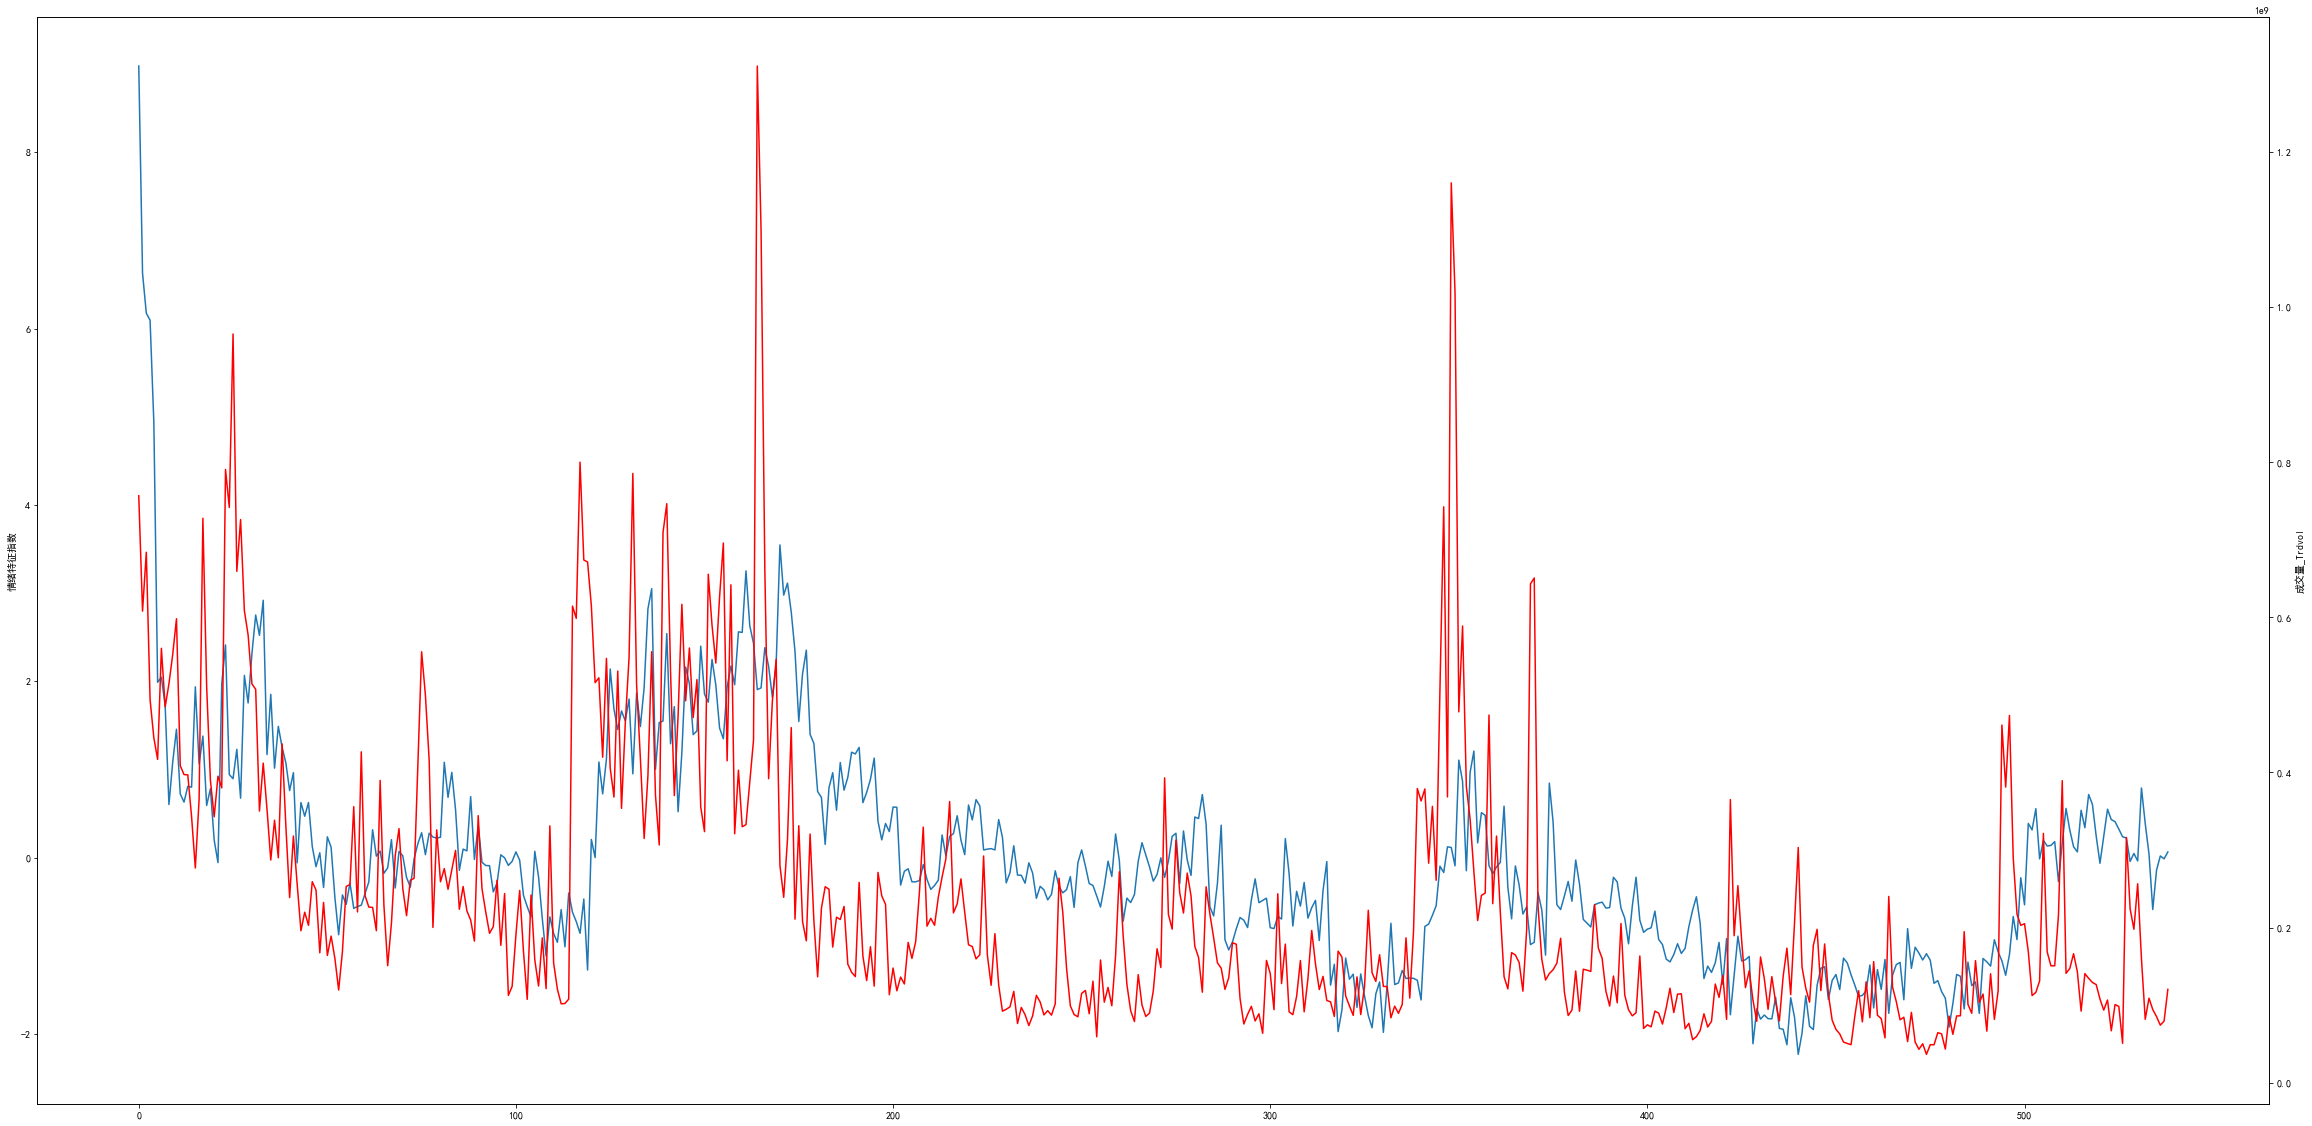

In [9]:
fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(111)
ax1.plot(range(n),emotion)
ax2 = ax1.twinx()
ax2.plot(range(n),df['成交量_Trdvol'][5:],'r')
ax1.set_ylabel('情绪特征指数')
ax2.set_ylabel('成交量_Trdvol')
plt.savefig('情绪指数with成交量.jpg')
plt.show()

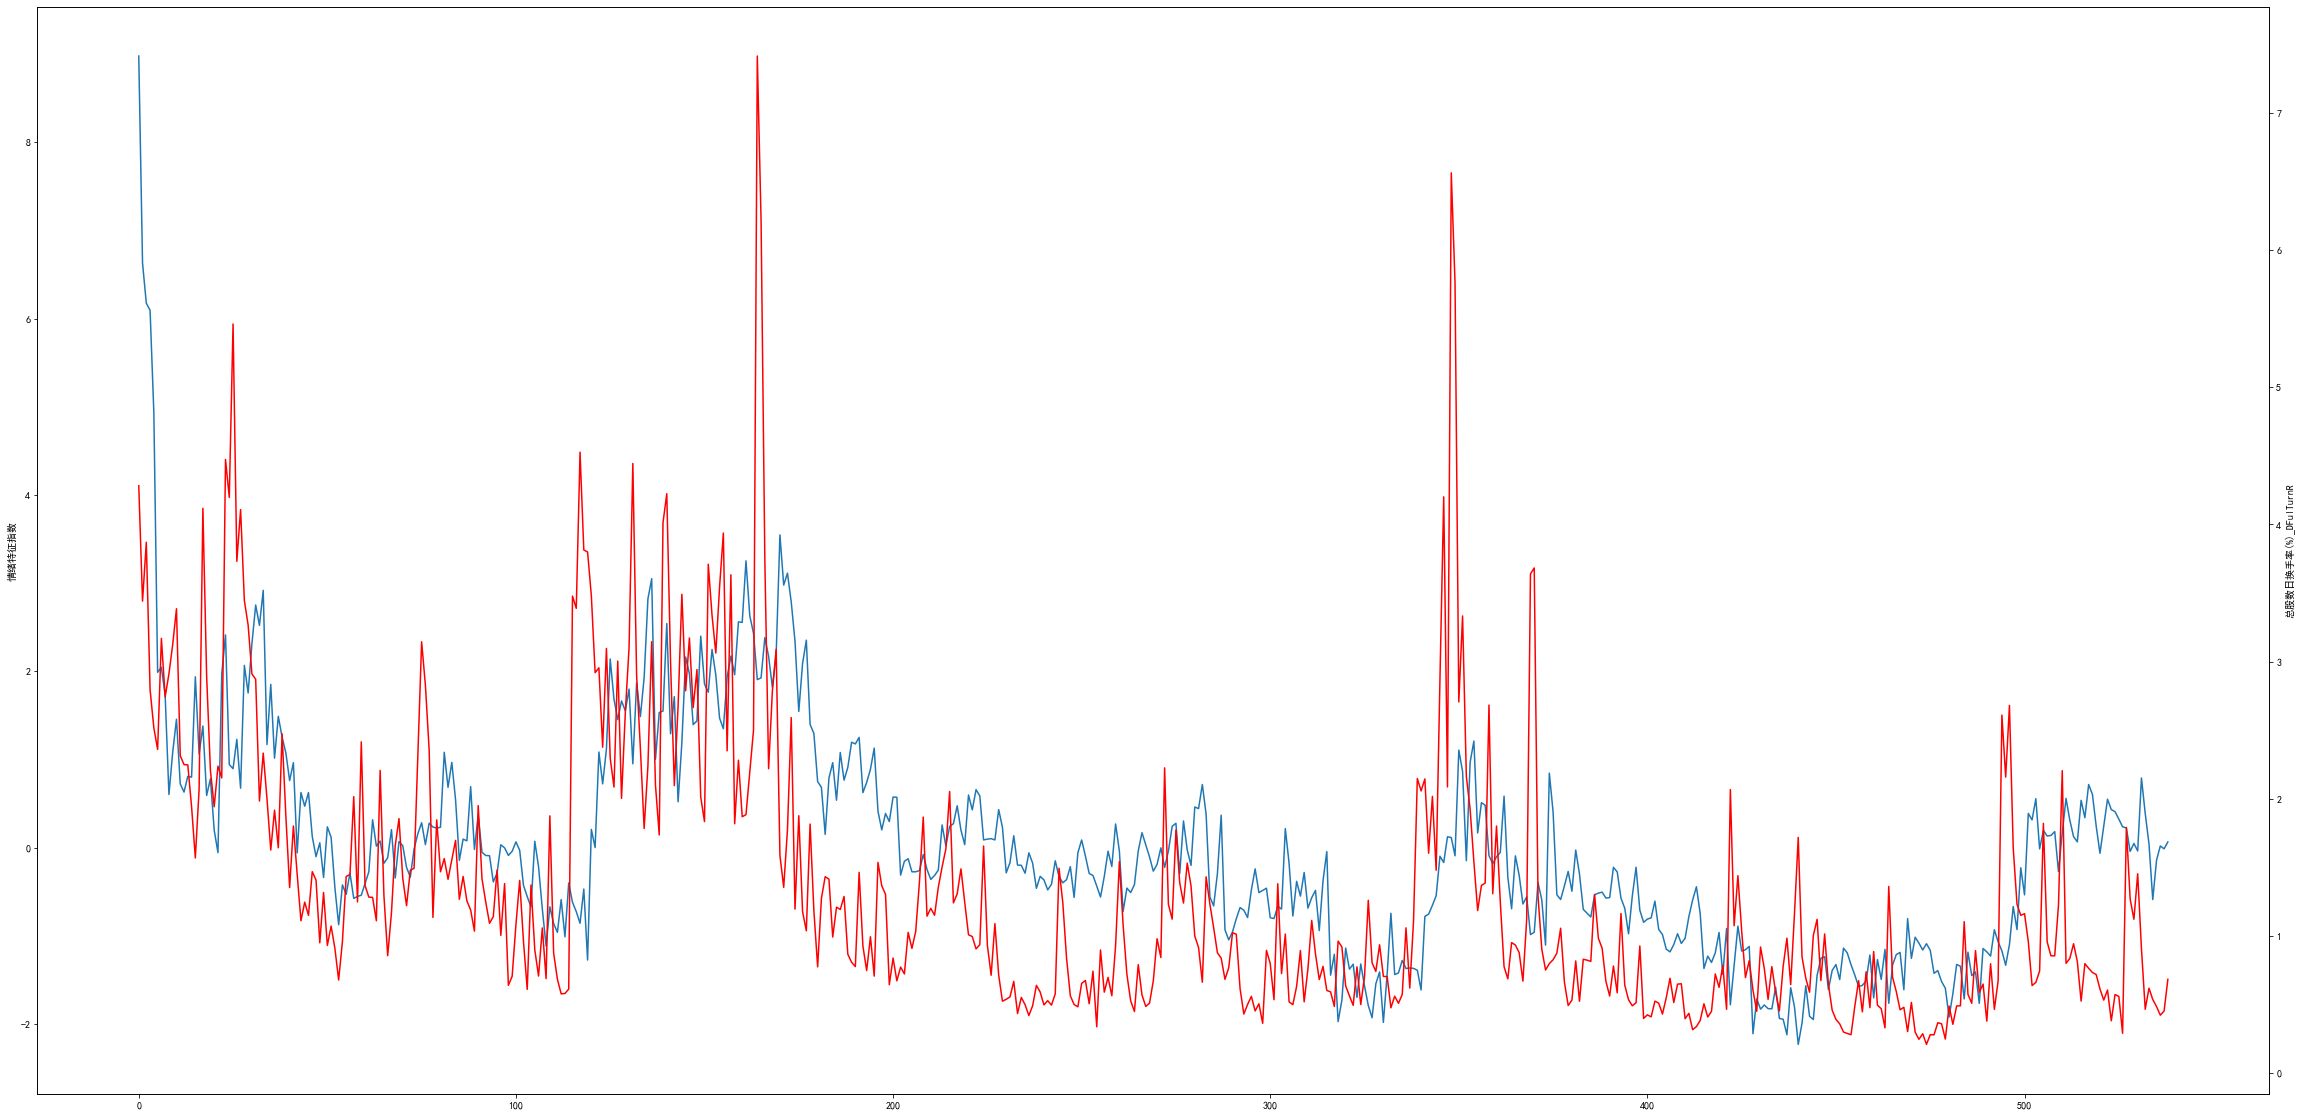

In [10]:
fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(111)
ax1.plot(range(n),emotion)
ax2 = ax1.twinx()
ax2.plot(range(n),df['总股数日换手率(%)_DFulTurnR'][5:],'r')
ax1.set_ylabel('情绪特征指数')
ax2.set_ylabel('总股数日换手率(%)_DFulTurnR')
plt.savefig('情绪指数with总股数日换手率(%)_DFulTurnR.jpg')
plt.show()

## 情绪指数和成交量的格兰杰因果检验
互相的

In [11]:
for index in ['总股数日换手率(%)_DFulTurnR','成交量_Trdvol']:
    print('-'*40)
    print('情绪指数  with    '+index)
    temp = []
    temp.append(emotion)
    temp.append(df[index][5:].tolist())
    temp = pd.DataFrame(temp).T
    grangercausalitytests(temp, maxlag=4)
    print('-'*40)
    print(index + '  with  情绪指数')
    temp = []
    temp.append(df[index][5:].tolist())
    temp.append(emotion)
    temp = pd.DataFrame(temp).T
    grangercausalitytests(temp, maxlag=4)
    print('-'*40)

----------------------------------------
情绪指数  with    总股数日换手率(%)_DFulTurnR

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=31.8947 , p=0.0000  , df_denom=535, df_num=1
ssr based chi2 test:   chi2=32.0735 , p=0.0000  , df=1
likelihood ratio test: chi2=31.1538 , p=0.0000  , df=1
parameter F test:         F=31.8947 , p=0.0000  , df_denom=535, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.1939 , p=0.0000  , df_denom=532, df_num=2
ssr based chi2 test:   chi2=36.7298 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5282 , p=0.0000  , df=2
parameter F test:         F=18.1939 , p=0.0000  , df_denom=532, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.9454 , p=0.0000  , df_denom=529, df_num=3
ssr based chi2 test:   chi2=36.3105 , p=0.0000  , df=3
likelihood ratio test: chi2=35.1335 , p=0.0000  , df=3
parameter F test:         F=11.9454 , p=0.0000  , df_denom=529, df_num=3

Granger Causality

In [12]:
from statsmodels.tsa.api import VAR
VAR_data = []
VAR_data.append(emotion)
VAR_data.append(df['成交量_Trdvol'][5:].tolist())
VAR_data = pd.DataFrame(VAR_data).T
model = VAR(VAR_data)
maxlags = 5
results = model.fit(maxlags=maxlags, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Sep, 2023
Time:                     01:57:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    35.3455
Nobs:                     534.000    HQIC:                   35.2382
Log likelihood:          -10883.6    FPE:                1.87839e+15
AIC:                      35.1692    Det(Omega_mle):     1.80333e+15
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.366042         0.040536           -9.030           0.000
L1.0          0.525115         0.041135           12.766           0.000
L1.1          0.000000         0.000000            0.492           0.623
L2.0          0.129964 

0.898876404494382


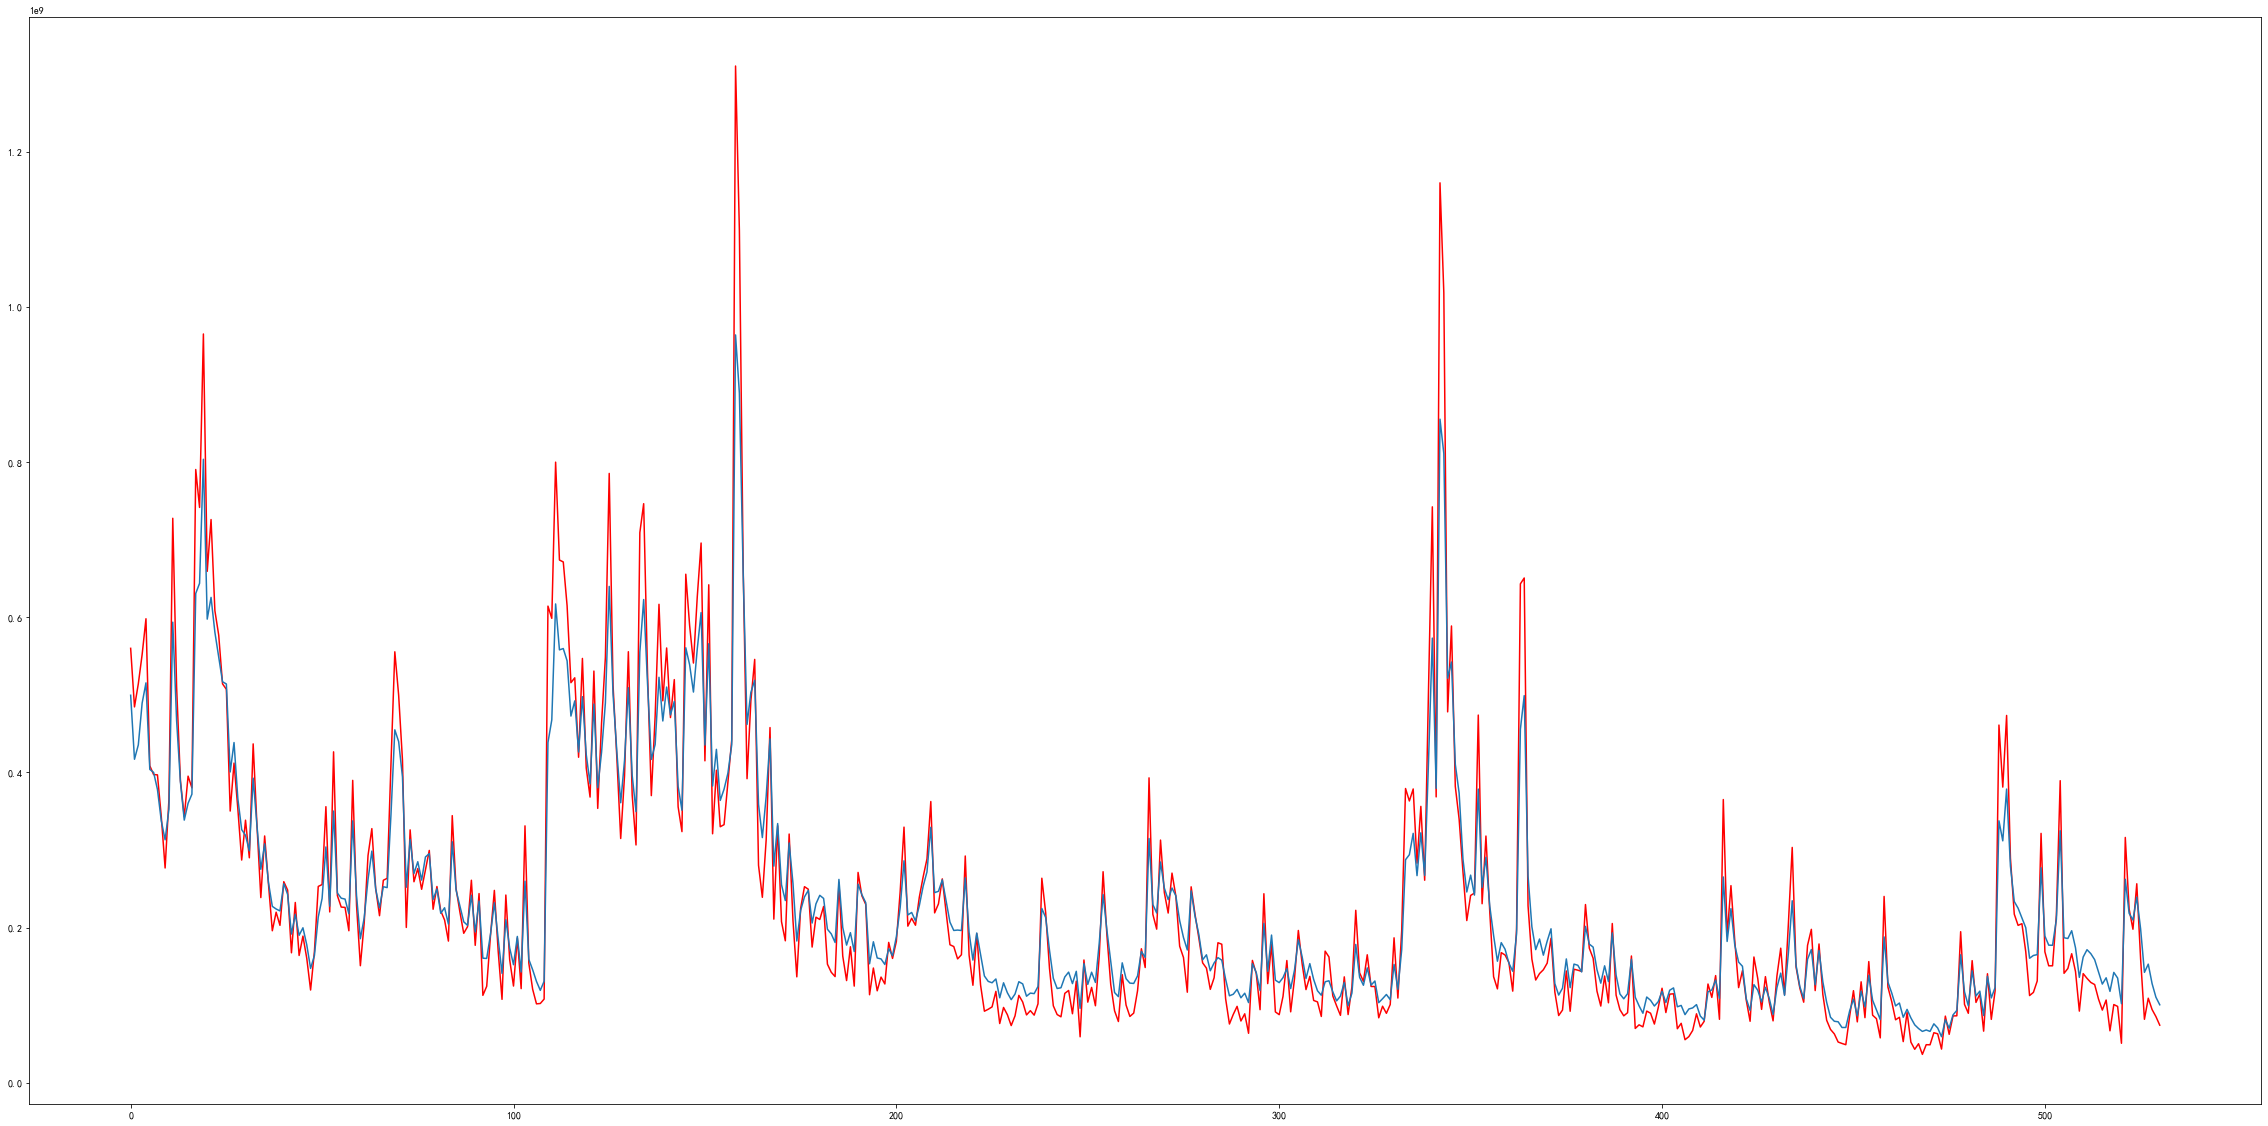

In [13]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
lag_order = results.k_ar
y1 = []
y2 = []
count = 0
for i in range(n-maxlags-1):
    forecast_input = VAR_data.values[i:i+maxlags]
    forecast = results.forecast(forecast_input, steps=1)
    y1.append(forecast[0][1])
    y2.append(VAR_data.values[i+maxlags+1][1])
    if abs(forecast[0][1]-VAR_data.values[i+maxlags+1][1]) < 0.17*1e9:
        count +=1

print(count/(n-maxlags))


fig = plt.figure(figsize=(40,20))
plt.plot(range(531),y2[:-2],'r')
plt.plot(range(531),y1[2:])
plt.savefig('成交量_Trdvol预测.jpg')
plt.show()


In [14]:
from statsmodels.tsa.api import VAR
VAR_data = []
VAR_data.append(emotion)
VAR_data.append(df['总股数日换手率(%)_DFulTurnR'][5:].tolist())
VAR_data = pd.DataFrame(VAR_data).T
model = VAR(VAR_data)
maxlags = 5
results = model.fit(maxlags=maxlags, ic='fpe')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Sep, 2023
Time:                     01:57:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.63392
Nobs:                     534.000    HQIC:                  -2.74126
Log likelihood:          -743.087    FPE:                  0.0601900
AIC:                     -2.81026    Det(Omega_mle):       0.0577848
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.366042         0.040536           -9.030           0.000
L1.0          0.525115         0.041135           12.766           0.000
L1.1          0.013977         0.028421            0.492           0.623
L2.0          0.129966 

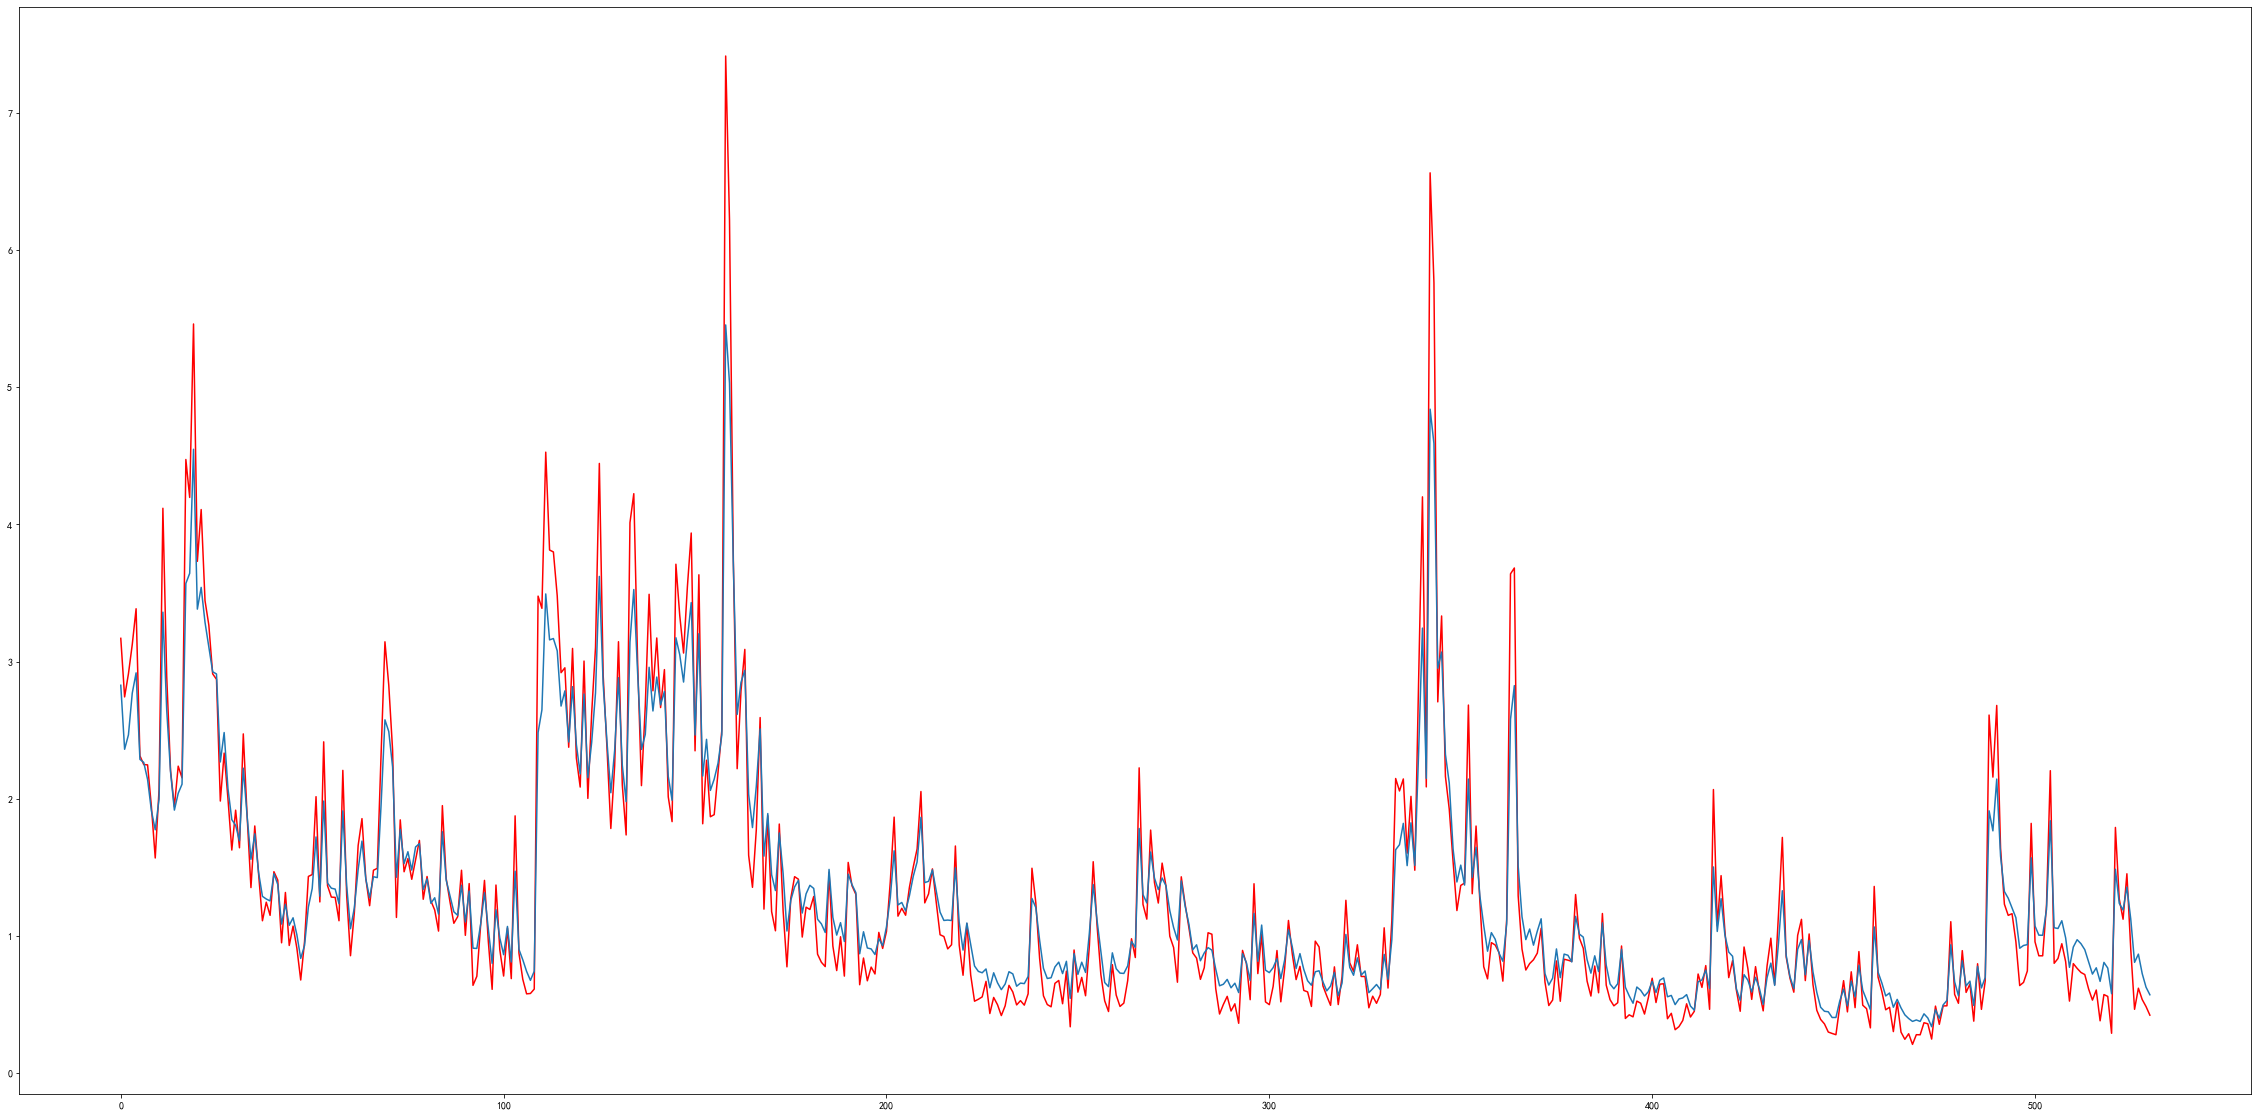

In [15]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
lag_order = results.k_ar
y1 = []
y2 = []
for i in range(n-maxlags-1):
    forecast_input = VAR_data.values[i:i+maxlags]
    forecast = results.forecast(forecast_input, steps=1)
    y1.append(forecast[0][1])
    y2.append(VAR_data.values[i+maxlags+1][1])


fig = plt.figure(figsize=(40,20))
plt.plot(range(531),y2[:-2],'r')
plt.plot(range(531),y1[2:])
plt.savefig('总股数日换手率(%)_DFulTurnR预测.jpg')
plt.show()
